In [7]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    

In [8]:
fetch_housing_data()

In [9]:
import pandas as pd

def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [10]:
housing=load_housing_data()
housing.tail(10)
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [12]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


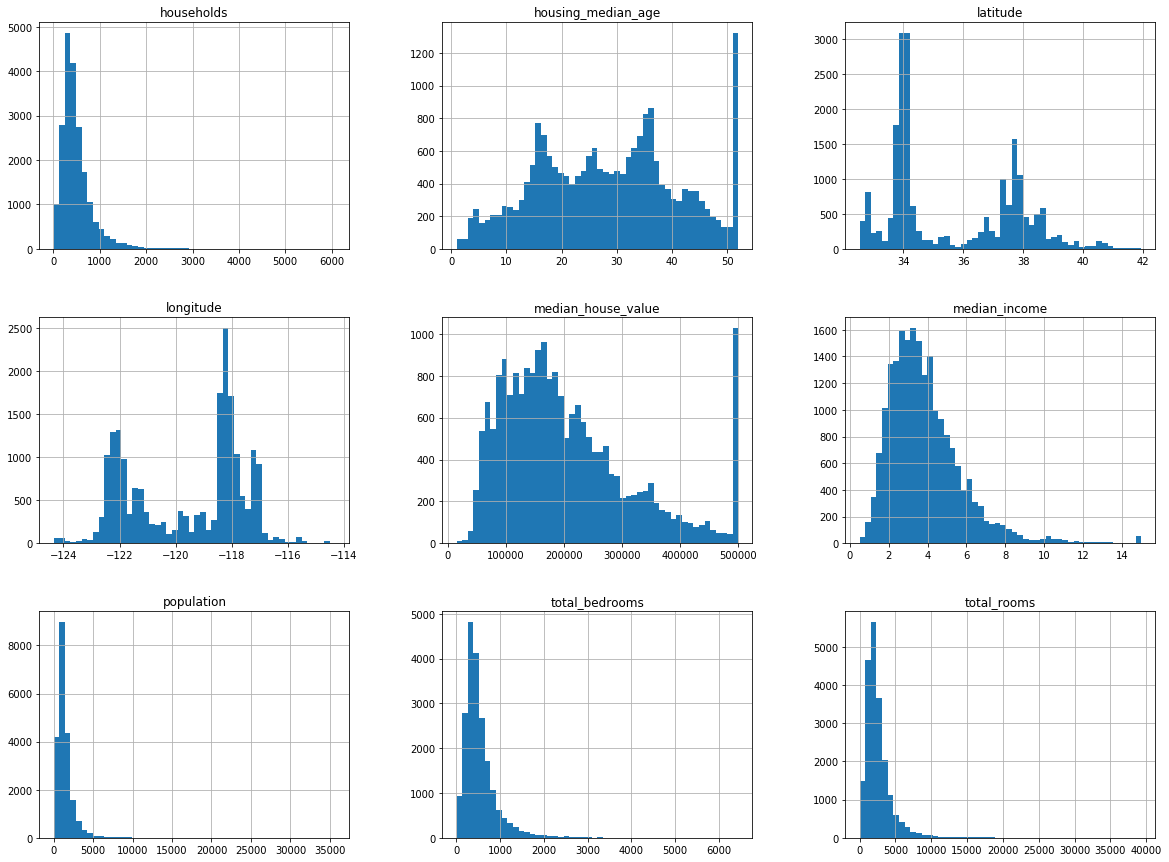

In [19]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [20]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indicies = np.random.permutation(len(data))
    test_size = int(len(data) * test_ratio)
    test_indicies = shuffled_indicies[:test_size]
    train_indicies = shuffled_indicies[test_size:]
    return data.iloc[train_indicies], data.iloc[test_indicies]


In [21]:
train_set, test_set = split_train_test(housing, 0.2)


In [22]:
len(train_set)

16512

In [23]:
len(test_set)

4128

In [24]:
len(housing)

20640

In [25]:
len(test_set) / len(housing)

0.2

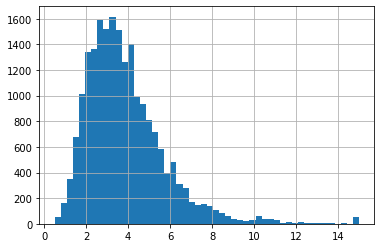

In [26]:
housing["median_income"].hist(bins=50)

count     20640
unique        5
top           3
freq       7236
Name: income_cat, dtype: int64

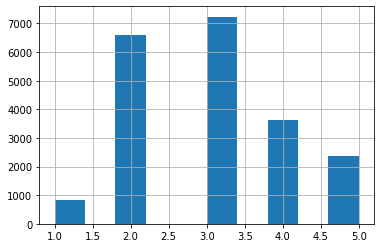

In [27]:
housing["income_cat"]=pd.cut(housing["median_income"], bins=[0, 1.5, 3.0, 4.5, 6, np.inf], labels=[1, 2, 3, 4, 5])
housing["income_cat"].hist()
housing["income_cat"].describe()


In [28]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [29]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [30]:
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [31]:
housing = strat_train_set.copy()

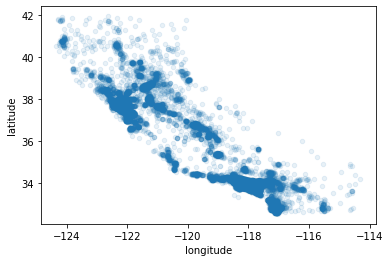

In [32]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

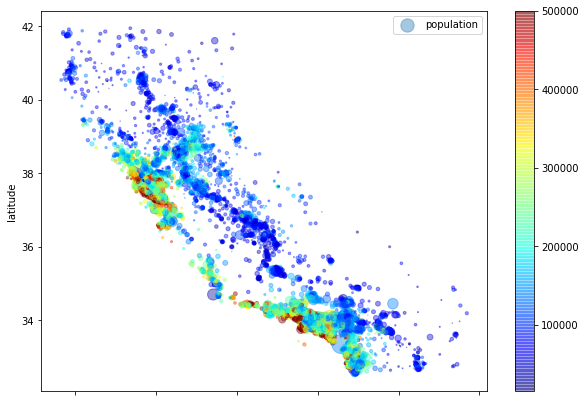

In [33]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, 
             s=housing["population"]/100, label="population", 
             figsize=(10,7),
             c=housing["median_house_value"], cmap=plt.get_cmap("jet"), colorbar=True)

In [34]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BC75F44B00>,
      dtype=object)

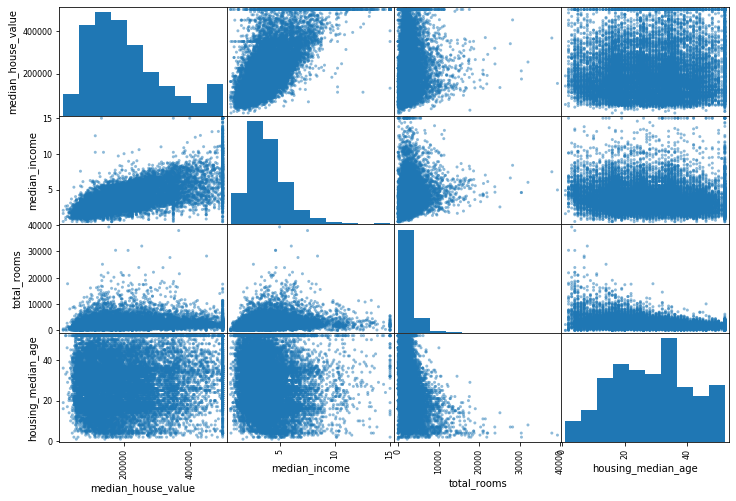

In [35]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

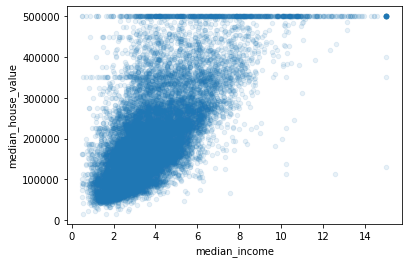

In [36]:
housing.plot(kind="scatter", y="median_house_value", x="median_income", alpha=0.1)

In [37]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,2
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,5
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,2
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,2
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,3


In [38]:
corr_matrix["households"].sort_values(ascending=False)

households            1.000000
total_bedrooms        0.980170
total_rooms           0.918392
population            0.904637
median_house_value    0.064506
longitude             0.063070
median_income         0.010781
latitude             -0.077647
housing_median_age   -0.306428
Name: households, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BC759E4978>,
      dtype=object)

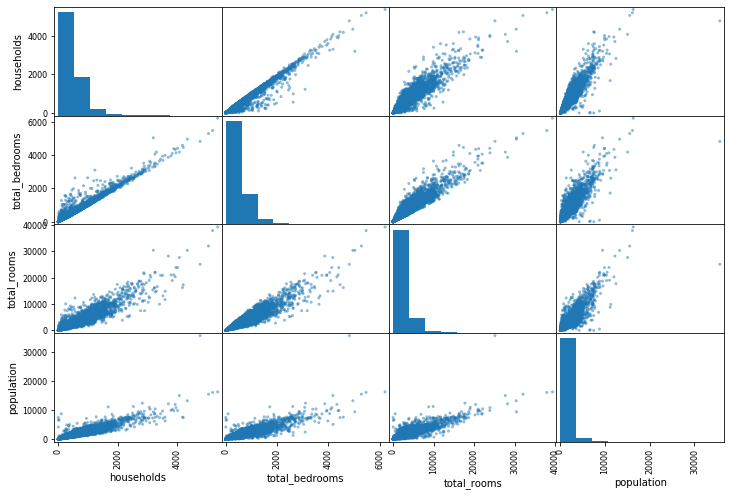

In [39]:
from pandas.plotting import scatter_matrix

attributes = ["households", "total_bedrooms", "total_rooms", "population"]
scatter_matrix(housing[attributes], figsize=(12, 8))

In [40]:
housing["rooms_per_household"]=housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"]=housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [41]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [42]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,534.973890,1419.790819,497.060380,3.875589,206990.920724,5.440341,0.212878,3.096437
std,2.001860,2.138058,12.574726,2138.458419,412.699041,1115.686241,375.720845,1.904950,115703.014830,2.611712,0.057379,11.584826
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566775,119800.000000,4.442040,0.175304,2.431287
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900,179500.000000,5.232284,0.203031,2.817653
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.250000,602.000000,4.744475,263900.000000,6.056361,0.239831,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


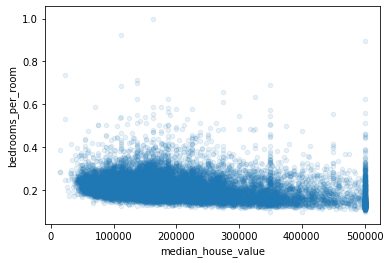

In [43]:
housing.plot(kind="scatter", x="median_house_value", y="bedrooms_per_room", alpha=0.1)

In [44]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 14 columns):
longitude                   16512 non-null float64
latitude                    16512 non-null float64
housing_median_age          16512 non-null float64
total_rooms                 16512 non-null float64
total_bedrooms              16354 non-null float64
population                  16512 non-null float64
households                  16512 non-null float64
median_income               16512 non-null float64
median_house_value          16512 non-null float64
ocean_proximity             16512 non-null object
income_cat                  16512 non-null category
rooms_per_household         16512 non-null float64
bedrooms_per_room           16354 non-null float64
population_per_household    16512 non-null float64
dtypes: category(1), float64(12), object(1)
memory usage: 1.8+ MB


In [45]:
housing_num = housing.drop("ocean_proximity", axis=1)

In [46]:
housing_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 13 columns):
longitude                   16512 non-null float64
latitude                    16512 non-null float64
housing_median_age          16512 non-null float64
total_rooms                 16512 non-null float64
total_bedrooms              16354 non-null float64
population                  16512 non-null float64
households                  16512 non-null float64
median_income               16512 non-null float64
median_house_value          16512 non-null float64
income_cat                  16512 non-null category
rooms_per_household         16512 non-null float64
bedrooms_per_room           16354 non-null float64
population_per_household    16512 non-null float64
dtypes: category(1), float64(12)
memory usage: 1.7 MB


In [47]:
# fulfill empty fields with median() value

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
imputer.fit(housing_num)
X=imputer.transform(housing_num)

In [48]:
imputer.statistics_

array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.11950000e+03,
        4.33000000e+02,  1.16400000e+03,  4.08000000e+02,  3.54090000e+00,
        1.79500000e+05,  3.00000000e+00,  5.23228423e+00,  2.03031374e-01,
        2.81765270e+00])

In [49]:
housing_num.median()

longitude                     -118.510000
latitude                        34.260000
housing_median_age              29.000000
total_rooms                   2119.500000
total_bedrooms                 433.000000
population                    1164.000000
households                     408.000000
median_income                    3.540900
median_house_value          179500.000000
income_cat                       3.000000
rooms_per_household              5.232284
bedrooms_per_room                0.203031
population_per_household         2.817653
dtype: float64

In [50]:
# --- transform text field to number

from sklearn.preprocessing import OrdinalEncoder

housing_proximity = strat_test_set[["ocean_proximity"]]

ordinal_encoder = OrdinalEncoder()
housing_proximity_enc = ordinal_encoder.fit_transform(housing_proximity)
housing_proximity_enc[:10]

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [4.],
       [1.],
       [1.]])

In [51]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [52]:
# --- transform text field to one-hot

from sklearn.preprocessing import OneHotEncoder

housing_proximity = strat_test_set[["ocean_proximity"]]

one_hot_encoder = OneHotEncoder()
housing_proximity_1hot = one_hot_encoder.fit_transform(housing_proximity)
housing_proximity_1hot[:10]

<10x5 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [53]:
housing_proximity_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [54]:
from sklearn.base import BaseEstimator, TransformerMixin

# get the right column indices: safer than hard-coding indices 3, 4, 5, 6
rooms_ix, bedrooms_ix, population_ix, household_ix = [
    list(housing.columns).index(col)
    for col in ("total_rooms", "total_bedrooms", "population", "households")]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kwargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [61]:
# --- pipeline for numerical attributes only

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

housing_num = strat_train_set.drop(["median_house_value","ocean_proximity"], axis=1)

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [62]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

housing = strat_train_set.drop("median_house_value", axis=1)

housing_prepared = full_pipeline.fit_transform(housing)

In [127]:
housing_prepared[3]

array([-0.01706767,  0.31357576, -0.29052016, -0.36276217, -0.39675594,
        0.03604096, -0.38343559, -1.04556555, -0.95445595, -0.07966124,
        0.08973561, -0.19645314,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ])

In [69]:
housing_labels = strat_train_set["median_house_value"].copy()

In [70]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
lin_reg.coef_

array([-54137.20708781, -55013.2872116 ,  14392.68343212,  -4044.59678427,
         8934.3560095 , -44845.68344469,  44884.77513654,  63514.86266688,
        14179.47426921,   6474.20838974,    994.94379601,  10585.71987677,
       -19784.87521119, -55494.63192495, 114626.55255433, -24057.75380645,
       -15289.29161173])

In [119]:
lin_reg.coef_.shape

(17,)

In [130]:
num_attribs

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'income_cat']

In [75]:
# --- prediction error
lin_reg.score(housing_prepared, housing_labels)

0.6507370633860871

In [76]:
lin_reg.predict(housing_prepared[:5])

array([203682.37379543, 326371.39370781, 204218.64588245,  58685.4770482 ,
       194213.06443039])

In [77]:
housing_labels[:5]

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
Name: median_house_value, dtype: float64

In [81]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_predictions, housing_labels)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68376.64295459939

In [96]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

random_reg = RandomForestRegressor()
random_reg.fit(housing_prepared, housing_labels)

C:\Users\ikuchin\AppData\Local\Continuum\miniconda3\envs\nnseries\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [83]:
# --- cost of the DecisionTreeRegressor model
np.sqrt(mean_squared_error(tree_reg.predict(housing_prepared), housing_labels))

0.0

In [100]:
# --- cost of the RandomTreeRegressor model
np.sqrt(mean_squared_error(random_reg.predict(housing_prepared), housing_labels))

22490.424236852497

In [84]:
def display_scores(scores):
    print("Scores:" , scores)
    print("Mean: ", scores.mean())
    print("Std dev: ", scores.std())

In [98]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores=np.sqrt(-scores)

scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores=np.sqrt(-scores)

scores = cross_val_score(random_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
random_rmse_scores=np.sqrt(-scores)


In [94]:
display_scores(tree_rmse_scores)

Scores: [70222.18470495 67517.19338948 70969.30139885 69276.75063362
 69597.16156166 74453.57875958 70744.19143108 71071.27428427
 76488.14877569 68698.76369464]
Mean:  70903.85486338349
Std dev:  2549.3955347667893


In [95]:
display_scores(lin_rmse_scores)

Scores: [66877.52325028 66608.120256   70575.91118868 74179.94799352
 67683.32205678 71103.16843468 64782.65896552 67711.29940352
 71080.40484136 67687.6384546 ]
Mean:  68828.99948449331
Std dev:  2662.7615706103443


In [99]:
display_scores(random_rmse_scores)

Scores: [52067.29461516 50923.08544747 52102.16413905 55023.89748779
 53247.01799264 56047.66928235 50685.01767569 50189.6188006
 54375.42878286 53077.75837624]
Mean:  52773.89525998484
Std dev:  1846.0523401587436


In [101]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators':[3,10,30], 'max_features':[ 4, 6, 10, 11],
     'bootstrap':[False], 'n_estimators':[10,30], 'max_features':[10, 11],
    }
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'bootstrap': [False], 'max_fea

In [102]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 10, 'n_estimators': 30}

In [103]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
                      max_features=10, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [104]:
grid_search.cv_results_

{'mean_fit_time': array([2.53125443, 7.18145061, 2.74629874, 7.87624769]),
 'std_fit_time': array([0.03830664, 0.69260493, 0.05378002, 0.62982875]),
 'mean_score_time': array([0.02236958, 0.06202712, 0.02246346, 0.06502819]),
 'std_score_time': array([0.00079741, 0.001025  , 0.00073717, 0.00325481]),
 'param_bootstrap': masked_array(data=[False, False, False, False],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=[10, 10, 11, 11],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[10, 30, 10, 30],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'bootstrap': False, 'max_features': 10, 'n_estimators': 10},
  {'bootstrap': False, 'max_features': 10, 'n_estimators': 30},
  {'bootstrap': False, 'max_features': 11, 'n_estimators': 10},
  {'boo

In [105]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

52132.075203730856 {'bootstrap': False, 'max_features': 10, 'n_estimators': 10}
50466.34479261097 {'bootstrap': False, 'max_features': 10, 'n_estimators': 30}
52656.42498218313 {'bootstrap': False, 'max_features': 11, 'n_estimators': 10}
50601.74156864301 {'bootstrap': False, 'max_features': 11, 'n_estimators': 30}


In [108]:
grid_search.best_estimator_.feature_importances_

array([6.82555876e-02, 5.83781209e-02, 4.32972584e-02, 1.45440690e-02,
       1.42237143e-02, 1.35468378e-02, 1.28561682e-02, 3.55050770e-01,
       1.02028997e-01, 3.13011358e-02, 1.13433074e-01, 2.65314931e-02,
       5.61550922e-03, 1.34900980e-01, 1.10160834e-04, 2.52160267e-03,
       3.40452181e-03])

In [109]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
                      max_features=10, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [114]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
Y_test = strat_test_set["median_house_value"]

X_test_prepared = full_pipeline.transform(X_test)

final_prediction = final_model.predict(X_test_prepared)
np.sqrt((mean_squared_error(final_prediction, Y_test)))

48158.36486599122